# Model Evaluation & Fitting
## Predicting Boston Housing Prices

In [1]:
# import libraries  here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## 1- Data Exploration
 

### Import and explore the data. Clean the data for outliers and missing values. 

Download the Boston dataset from [here](https://drive.google.com/file/d/1Bux3hwVYr6BuFbdUIK2db1lOY6EqghfD/view?usp=sharing) , place it in the data folder and import it as dataframe. **The features in the dataset are described [here](https://www.kaggle.com/prasadperera/the-boston-housing-dataset)** 
<br> Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict. 

In [2]:
#your code here
boston = pd.read_csv('../Evaluation_Sup_learning/Boston.csv')
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [3]:
#your code here
print(boston.items())

<generator object DataFrame.items at 0x7fe9f1ef5b50>


In [4]:
# Your plots here
boston.drop(columns='Unnamed: 0', inplace=True)

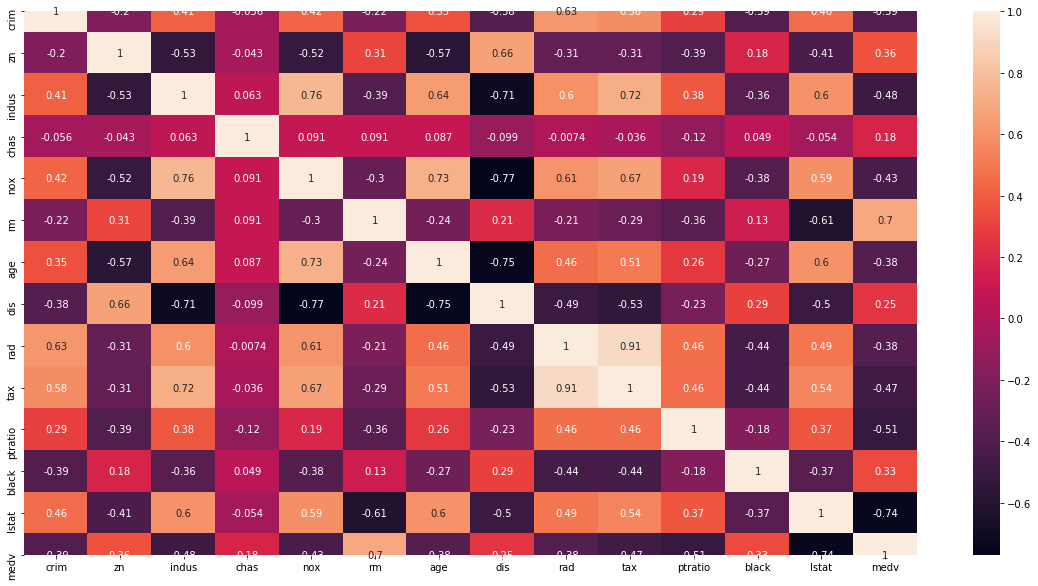

In [5]:
plt.figure(figsize=(20, 10))
sns.heatmap(boston.corr(),  annot=True)

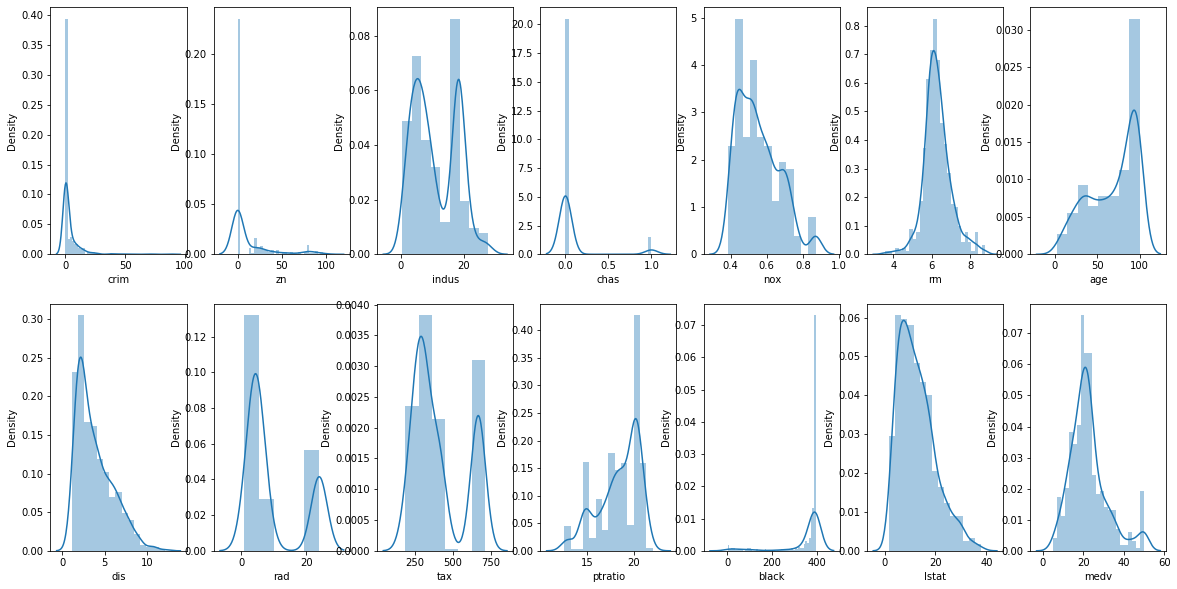

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sns.distplot(v, ax=axs[index])
    index += 1

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables? 
- Reference: https://www.kaggle.com/c/boston-housing

INDUS - proportion of non-retail business acres per town.
RM - average number of rooms per dwelling
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [7]:
#.abs() creates positive correlation matrix
corr_boston = boston.corr().abs()

#makes and applies mask to matrix
mask = np.triu(np.ones_like(corr_boston, dtype=bool))
tri_df = corr_boston.mask(mask)

#defines which rows are highly correlated
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.90)]
                              

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

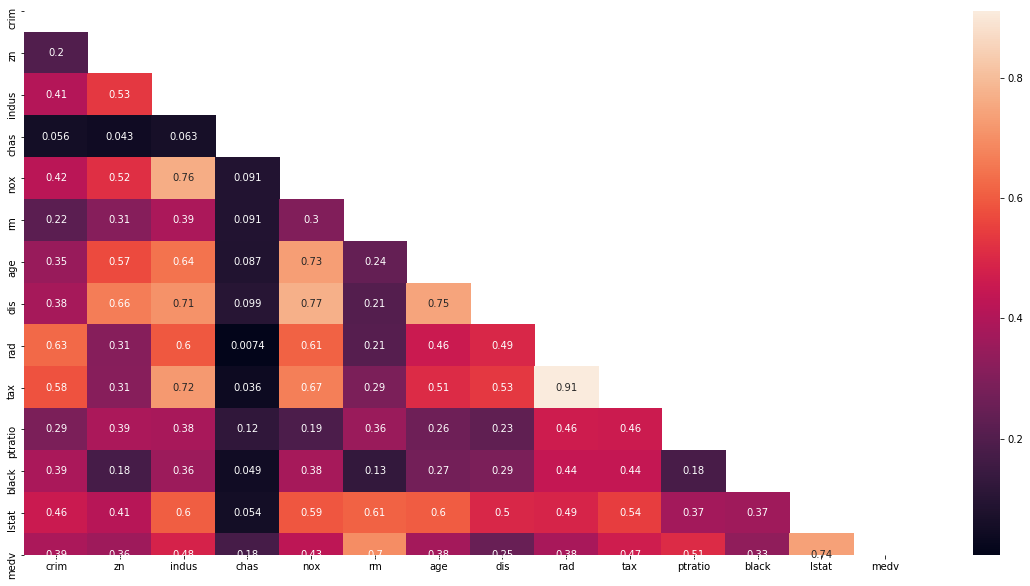

In [8]:
#your code here
#.abs() creates positive correlation matrix
corr_boston = boston.corr().abs()

#makes and applies mask to matrix
mask = np.triu(np.ones_like(corr_boston, dtype=bool))
tri_df = corr_boston.mask(mask)

plt.figure(figsize=(20, 10))
sns.heatmap(data=tri_df, annot=True)                          

#### Significant correlations


In [43]:
#your code here
### Your response here

#.abs() creates positive correlation matrix
corr_boston = boston.corrwith(boston['medv']).abs()

#medium to highly correlated are above 0.45
corr_variables = corr_boston.loc[(corr_boston < 0.45)]
print(corr_variables)

#Significant correlations are: lstat, then ptratio, tax, rm, indus

crim     0.388305
zn       0.360445
chas     0.175260
nox      0.427321
age      0.376955
dis      0.249929
rad      0.381626
black    0.333461
dtype: float64


### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [39]:
# Your code here
boston['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [11]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

----

## 2- Developing a Model

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [44]:
from sklearn.model_selection import train_test_split

#your code here
X = boston.drop(['medv', 'crim', 'zn', 'chas', 'nox', 'age', 'dis', 'rad', 'black'], axis=1).astype(int)
y = boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [45]:
from sklearn.ensemble import RandomForestRegressor

----

## 3- Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [64]:
#your code here
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import roc_curve, r2_score

max_depths = [2,4,6,8,10,12]
models = []
pred_te = []
pred_tr = []
def randomforestmodels(listofdepths):
    for x in listofdepths:
        model = RandomForestRegressor(random_state = 42, max_depth=x)
        model.fit(X_train, y_train)
        models.append(model)
        pred_test=model.predict(X_test)
        pred_train=model.predict(X_train)
        pred_te.append(r2_score(y_test, pred_test))
        pred_tr.append(r2_score(y_train,pred_train))
        x = x+1

randomforestmodels(max_depths)

Now, plot the score for each tree on the training set and on the testing set.

In [65]:
columns_test = ['max_depth_2','max_depth_4','max_depth_6','max_depth_8','max_depth_10']
df = pd.DataFrame(pred_te, columns=['test_scores'])
df['pred_tr'] = pred_tr
df = df.transpose()
df = df.rename(columns={0:'max_depth_2', 1: 'max_depth_4', 2: 'max_depth_6', 3 : 'max_depth_8', 4: 'max_depth_10', 5: 'max_depth_12' })

In [66]:
df_new = df.transpose()
df_new

,test_scores,pred_tr
max_depth_2,0.697068,0.735029
max_depth_4,0.775060,0.863577
max_depth_6,0.807978,0.912021
max_depth_8,0.774527,0.935226
max_depth_10,0.810262,0.945398
max_depth_12,0.804871,0.947326


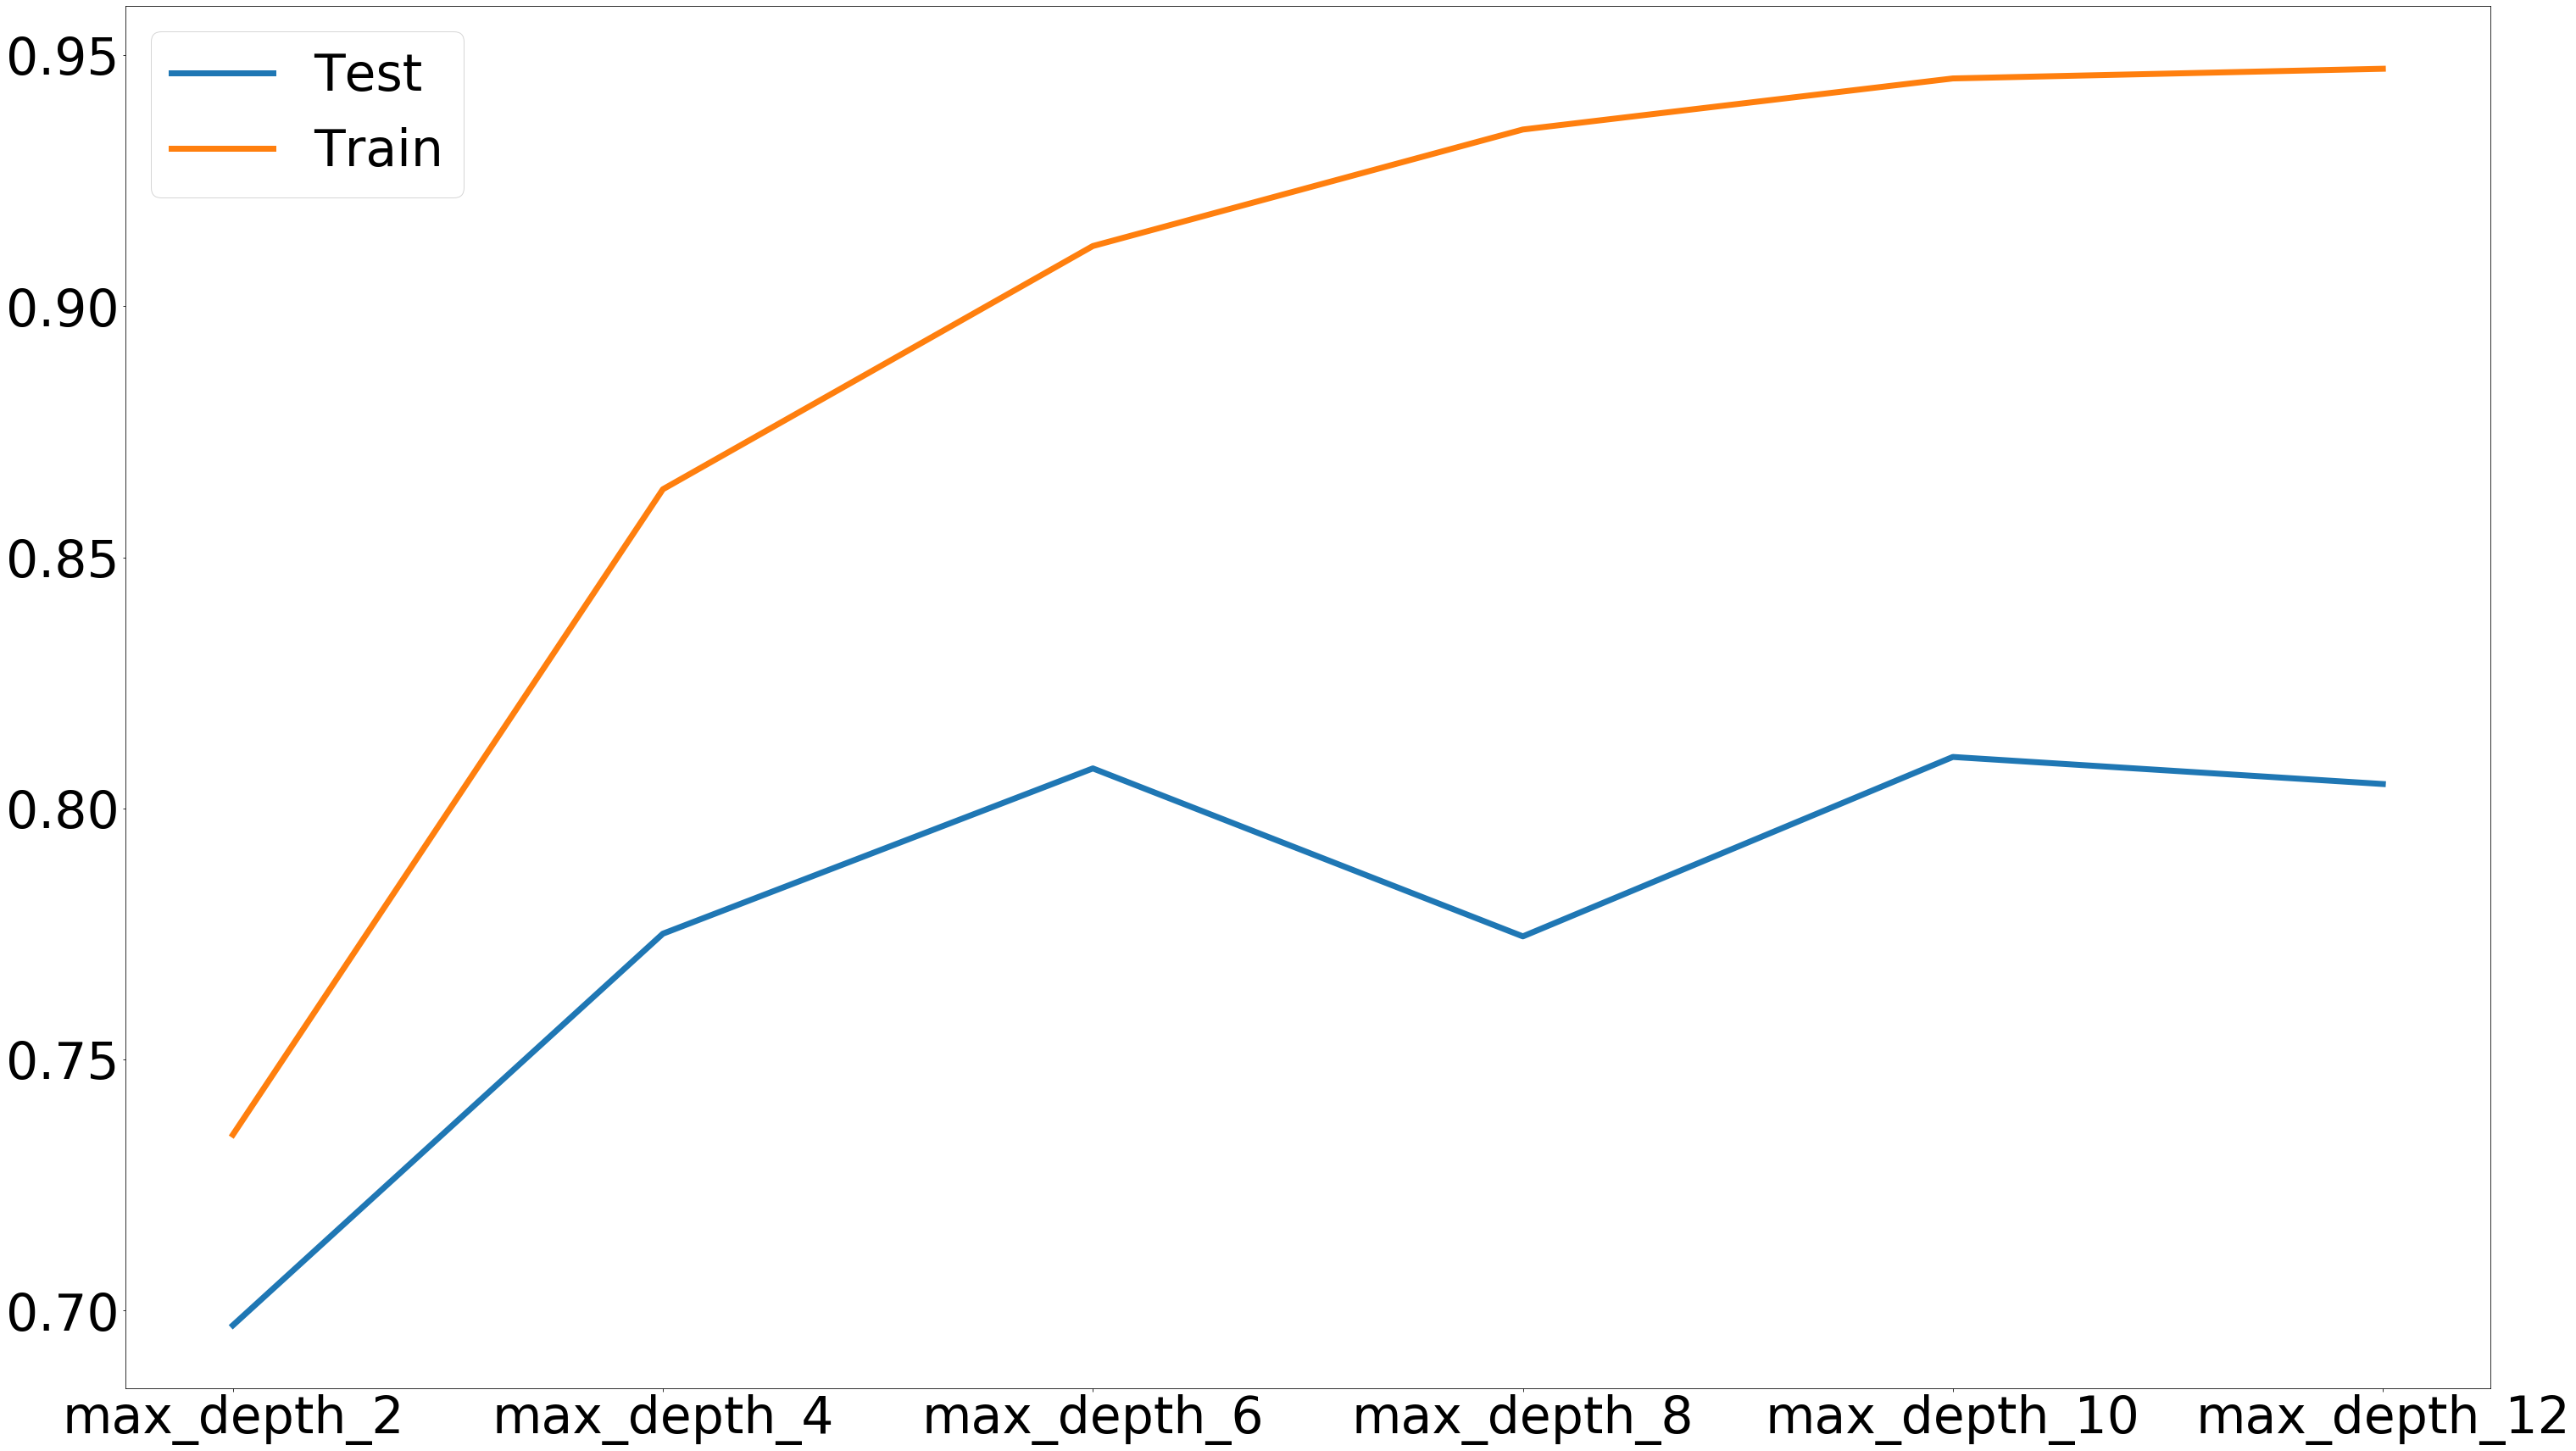

In [67]:
fig, ax = plt.subplots(figsize=(50, 30)) 
plt.plot(df_new, linewidth=7.0, label='Test')
x = df_new.index
y = df_new.columns
plt.xticks(size=60)
plt.yticks(size=60)
plt.legend(['Test', 'Train'],prop={'size': 60})
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?


In [68]:
# Your response here
#As long as the accuracy on both the training and test size improve, it makes sense to increase the depth of trees of the model.
#For this specific model after a max depth of 10, the scores start to diverge. This means at max_depth_12 the model likely starts overfitting.
#Max depth of 10 shows to be most accurate for this model.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [69]:
# Your response here
#At a maximum depth of one, the model suffers from high variance. The accuracy on both the test and train set is the lowest.
#Instead, at max_depth 12, the scoring on the train set improves but comparing to max_depth_10 the test set score decreases. Thus the model is overfitting meaning it is likely to be biased.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Based on your previous results run your model and explain its performance.

#### Train the Random forest regressor model with the optimal value for max_depth

In [70]:
#your code here
model = RandomForestRegressor(random_state = 42, max_depth=10)
model.fit(X_train, y_train)
rf_pred = model.predict(X_test)

#### Use the mean absolute error (MAE) to calculate the performance of the model

In [60]:
#your code here
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(y_test,rf_pred))

MAE: 2.674978209757562


#### Use the root mean squared error (RMSE) to calculate the performance of the model

In [61]:
from sklearn.metrics import mean_squared_error
import math
#your code here
mse = mean_squared_error(y_test,rf_pred)
print ("RMSE:", math.sqrt(mse))

RMSE: 3.7301777193294297


#### Create a function that calculates  and returns the r2 score as performance metric

In [62]:
#your code here
def calc_r2(model):
    """input: a model
        output: r2 score as performance metric"""
    model = RandomForestRegressor(random_state = 42, max_depth=8)
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    print("The r2 score of this model is:", r2_score(y_test, pred_test))
    return

#### Calculate the r2 score of the model using the function defined above

In [63]:
#your code here
calc_r2(RandomForestRegressor(random_state = 42, max_depth=8))

The r2 score of this model is: 0.7745268580334755


#### Bonus question
Read [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) 
about the differences between MAE and RMSE. Do you think that one of the two types of error is more appropriate for this problem, and why?

In [25]:
#your answer here

### 4 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [26]:
#Your response here

#The model is not relevant for estimating current house prices. 
#It could however be used to predict home prices around 1978 if, for example, data in databases 
#is missing the model could be used to fill missing data point.

#The features are definetely not sufficient to describe a home and base a purchasing decision on. But it could
#be helpful in other situations.

#The performance of the model is quite accurate. The mean of prices being 22.532806, and a MAE of 2.5 
#means a 10% deviation. Again, it totally depends on the purpose of the predictions and the accepted error.